Lånebeløp


 1000000


Nedbetalingsår


 2


Rente


 5


Den årlige renten på dette lånet er: = 5.0 %
Lengden på lånet i måneder er: = 24 måneder
Månedlige betalinger for dette lånet blir på: = 43871.39 Kr
Den totale summen av renter betalt blir: = 52913.35


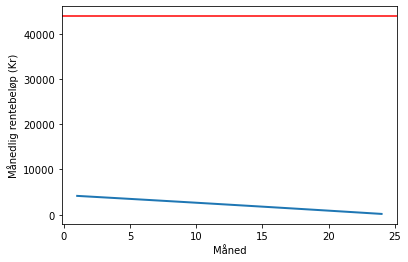

Betaling  Beløp     Rente     Avdrag    Restlån             
    1   43,871.391,004,166.67 -960,295.28   39,704.72
    2   43,871.39 39,870.16    4,001.23   35,703.49
    3   43,871.39 35,852.26    8,019.13   27,684.36
    4   43,871.39 27,799.71   16,071.68   11,612.68
    5   43,871.39 11,661.07   32,210.32  -20,597.64
    6   43,871.39 20,683.46   23,187.93  -43,785.57
    7   43,871.39 43,968.01      -96.62  -43,882.18
    8   43,871.39 44,065.03     -193.64  -44,075.82
    9   43,871.39 44,259.47     -388.08  -44,463.90
   10   43,871.39 44,649.16     -777.77  -45,241.67
   11   43,871.39 45,430.17   -1,558.78  -46,800.45
   12   43,871.39 46,995.45   -3,124.06  -49,924.52
   13   43,871.39 50,132.53   -6,261.14  -56,185.66
   14   43,871.39 56,419.77  -12,548.38  -68,734.04
   15   43,871.39 69,020.43  -25,149.04  -93,883.07
   16   43,871.39 94,274.25  -50,402.86 -144,285.94
   17   43,871.39144,887.13 -101,015.74 -245,301.67
   18   43,871.39246,323.76 -202,452.37 -447,754.05
 

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Lager inputs der brukeren kan taste inn verdiene sine
def Verdier():
    print("Lånebeløp")
    låne_sum = float(input())
    print("Nedbetalingsår")
    låne_periode = float(input())
    lån_termin = int(12*låne_periode)
    print("Rente")
    lån_rente = float(input())
    return låne_sum, låne_periode, lån_termin, lån_rente

def Kalk(låne_sum, låne_periode, lån_termin, lån_rente):   
    R = 1 + (lån_rente)/(12*100)
    X = låne_sum*(R**lån_termin)*(1-R)/(1-R**lån_termin) # Funksjon for annuitetslån
    Månedlig_rente = []
    Månedlig_saldo = []
    
    for i in range(1, lån_termin+1):
        Rente = låne_sum*(R-1)
        låne_sum = låne_sum-(X-Rente)
        Månedlig_rente = np.append(Månedlig_rente,Rente)
        Månedlig_saldo = np.append(Månedlig_saldo, låne_sum)
    # Skriver ut hva beløpene blir
    print("Den årlige renten på dette lånet er: = " +str(lån_rente)+str(' %'))
    print("Lengden på lånet i måneder er: = " + str(lån_termin)+str(' måneder'))
    print("Månedlige betalinger for dette lånet blir på: = " +str(np.round(X,2)) + str(' Kr')) # Bruker round til å avrunde til to desimaler
    print("Den totale summen av renter betalt blir: = " + str(np.round(np.sum(Månedlig_rente),2)))

    # Prøver å plotte terminbeløp og rente i graf
    
    plt.plot(range(1, lån_termin+1), Månedlig_rente, lw=2)
    plt.axhline(y=X, color='red')
    plt.xlabel('Måned')
    plt.ylabel('Månedlig rentebeløp (Kr)')
    plt.show()   
    return X, R
        
def Terminbeløp_tabell (X, lån_termin, R, låne_sum):
    overskrift = '{0:10}{1:10}{2:10}{3:10}{4:20s}'
    verdier = '{0:5d}{1:12,.2f}{2:10,.2f}{3:12,.2f}{4:12,.2f}'
    print(overskrift.format('Betaling', 'Beløp', 'Rente', 'Avdrag', 'Restlån'))
    Restlån = abs(låne_sum)
    for Betaling in range(1, int(lån_termin)+1):
        Renter = abs(Restlån) * abs(R)
        Avdrag = abs(X) - abs(Renter)
        Restlån -= abs(Avdrag)
        print(verdier.format(Betaling, X, Renter, Avdrag, Restlån))
        
def Regn(): 
    låne_sum, låne_periode, lån_termin, lån_rente = Verdier()
    X, R = Kalk(låne_sum, låne_periode, lån_termin, lån_rente)
    Terminbeløp_tabell(X, lån_termin, R, låne_sum)

Regn()
  
    